# 2.2 Analysis of ASEAN-6 Saving Behavior

This section will explore the saving behavior of ASEAN 6 - specifically on their responses to pre-selected questions covering their Saving Behavior - specifically across different types of medium of savings.

The following questions were pre-selected to explore and compare saving behavior across ASEAN 6:

- <b>fin17a</b>: Saved at a bank or similar financial institution (%, age 15+)
- <b>fin17b</b>: Saved money using a mobile money account (%, age 15+)
- <b>fin17c</b>: Saved using a savings club or a person outside the family (%, age 15+)

Each question aims to capture the usage across ASEAN the various saving media. Does a certain country prefer to save in traditional, low-risk, but high-requirements banks or financial institutions? Or do they prefer the innovation and mobility mobile money accounts offer? Or does the region prefer to save using the least regulated organizations or people like savings clubs (e.g., paluwagan, cooperatives) and with non-family members?

<i> Survey Questions </i>
- Question for Banks/ Financial Institutions: "In the PAST 12 MONTHS, have you saved or set aside any money by using an account at a bank or similar financial institution?"
- Question for Money Wallets: "In the PAST 12 MONTHS, have you saved or set aside any money by using a mobile money account"
- Questions for Savings Clubs: "In the PAST 12 MONTHS, have you saved or set aside any money using an informal savings group/club such as a merry-go-round or a burial society, VICOBA or a person outside the family"

## Preliminaries 

In [1]:
file_path = r"C:\Users\eagen\Documents\Github\mab2115_finals\data\processed\global_findex_for_analysis.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df0 = pd.read_csv(file_path)
df0.head()

pd.options.display.max_rows = 10000

In [2]:
## Convert all 2022 Years to 2021
df0.replace(2022, 2021, inplace=True)
df0.groupby(['countrynewwb', 'year']).size()

countrynewwb  year
Indonesia     2014    11
              2017    11
              2021    11
              2024    13
Malaysia      2014    11
              2017    11
              2021    11
              2024    13
Philippines   2014    11
              2017    11
              2021    11
              2024    13
Singapore     2014     9
              2017    11
              2021    11
              2024    12
Thailand      2014    11
              2017    11
              2021    11
              2024    13
Viet Nam      2014    11
              2017    11
              2021    11
              2024    13
world         2014    11
              2017    11
              2021    11
              2024    13
dtype: int64

In [3]:
#Color codes
PH_COLOR = '#e74c3c'
ASEAN_COLOR = '#95a5a6'
WORLD_COLOR = '#2c3e50'

# Individual country colors
COUNTRY_COLORS = {
    'Philippines': '#e74c3c',    # Red
    'Indonesia': '#3498db',      # Blue
    'Malaysia': '#2ecc71',       # Green
    'Singapore': '#9b59b6',      # Purple
    'Thailand': '#f39c12',       # Orange
    'Viet Nam': '#1abc9c'        # Teal
}

#Function for color scheme to differentiate PH
def get_colors(dataframe):
    '''
    Assigns colors to countries in the dataframe to highlight Philippines.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        A dataframe containing a 'countrynewwb' column with country names.
    
    Returns:
    --------
    list
        A list of color codes where Philippines is colored with PH_COLOR
        and all other countries are colored with ASEAN_COLOR.
    '''
    colors = []
    for country in dataframe['countrynewwb']:
        if country == 'Philippines':
            colors.append(PH_COLOR)
        else:
            colors.append(ASEAN_COLOR)
    return colors

def get_country_color(country_name):
    """
    Returns color for a single country. If the country is not found in
    the dictionary, it returns the default ASEAN_COLOR.

    Parameters:
    -----------
    country_name : str
        The name of the country (e.g., 'Philippines', 'Indonesia').
    
    Returns:
    --------
    str
        A hexadecimal color code. Returns the country's specific color if 
        found in COUNTRY_COLORS, otherwise returns ASEAN_COLOR as default.
    """
    return COUNTRY_COLORS.get(country_name, ASEAN_COLOR)

In [4]:
df0

,countrynewwb,codewb,year,pop_adult,regionwb24_hi,incomegroupwb24,group,group2,account_t_d,fiaccount_t_d,...,con12m_s,con26lm_s,con12w_s,con2f_s,con13_s,con26m_s,con28lm_s,con5a_s,con17c_s,con32h_s
0,Indonesia,IDN,2014,185894322.0,East Asia & Pacific (excluding high income),Lower middle income,all,all,0.360590,0.359474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Malaysia,MYS,2014,22158615.0,East Asia & Pacific (excluding high income),Upper middle income,all,all,0.806746,0.806746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Philippines,PHL,2014,66911959.0,East Asia & Pacific (excluding high income),Lower middle income,all,all,0.312858,0.280657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Singapore,SGP,2014,4691514.0,High income,High income,all,all,0.963526,0.963526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thailand,THA,2014,56707280.0,East Asia & Pacific (excluding high income),Upper middle income,all,all,0.781366,0.781366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Viet Nam,VNM,2014,68893679.0,East Asia & Pacific (excluding high income),Lower middle income,all,all,0.309509,0.308644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Indonesia,IDN,2017,193777030.0,East Asia & Pacific (excluding high income),Lower middle income,all,all,0.488575,0.483921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Malaysia,MYS,2017,23682698.0,East Asia & Pacific (excluding high income),Upper middle income,all,all,0.853437,0.851300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Philippines,PHL,2017,71585383.0,East Asia & Pacific (excluding high income),Lower middle income,all,all,0.344984,0.317971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Singapore,SGP,2017,4905185.0,High income,High income,all,all,0.979312,0.978123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for col in df0.columns:
    print(col)

countrynewwb
codewb
year
pop_adult
regionwb24_hi
incomegroupwb24
group
group2
account_t_d
fiaccount_t_d
mobileaccount_t_d
borrow_any_t_d
fin4_d
dig_acc
fin11_2a
fin11a
fin11b
fin11c
fin11f
fin11d
fin11e
fin14a
fin14b
fin14c
fin14d
fin13_1a
fin13_1b
fin26a
fin26b
fin27a
fin27b
fin17f
fin17a_17a1_d
fin17a
fin17b
fin17c
fin22d
fin22e
fin22a_22a1_22g_d
fin22a
fin22a_1
fin22b
fin22c
fin24sav
fin24fam
fin24work
fin24bor
fin24sell
fin24other
fin24aVD
fin24aSD
fin24aND
fin24aSD_ND
fin24aP
fin24aN
fin24sav_SD_ND
fin24fam_SD_ND
fin24work_SD_ND
fin24bor_SD_ND
fin24sell_SD_ND
fin24other_SD_ND
fin24sav_VD
fin24fam_VD
fin24work_VD
fin24bor_VD
fin24sell_VD
fin24other_VD
fh1
fin28
fh2
fin29
fin31a_31b
fin30
fin31a
fin31b
fin31d
fin32_33_34a
fin32_33_34b
fin32_33_34c
fin32_33_34d
fin32_33_acc
fin32_33
fin32_n33_34a
fin32_n33_34b
fin32_n33_34c
fin32_n33_34d
fin32_n33_acc
fin32_n33
fin32
fin32_acc
fin34a
fin34b
fin34c
fin34d
fin37_38_39a
fin37_38_39b
fin37_38_39c
fin37_38_39d
fin37_38_39_acc
fin37_38
fin

In [6]:
df0.groupby(['countrynewwb', 'year', 'group', 'group2']).size()

countrynewwb  year  group       group2               
Indonesia     2014  age_cat     age 25+                  1
                                ages 15-24               1
                    all         all                      1
                    education   prim edu or less         1
                                secondary edu or more    1
                    gender      men                      1
                                women                    1
                    income      poorest 40%              1
                                richest 60%              1
                    laborforce  in laborforce            1
                                out of laborforce        1
              2017  age_cat     age 25+                  1
                                ages 15-24               1
                    all         all                      1
                    education   prim edu or less         1
                                secondary edu or more    1
  

In [7]:
for group in df0['group'].unique():
    print(group)

all
gender
income
age_cat
urbanicity
laborforce
education


## 2.1 Trend Across Time

This section will explore the overall trend of the saving behavior across the 3 platforms: (1) Bank/Financial Institutions, (2) Money Wallets, and (3) Savings Club or Non-Family Person/s

### 2.1.0 Preparation for Analysis

In [8]:
df_all = df0[df0['group']=='all']
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

def calculate_prct_change(df):
    try:
        df['17vs14 % Change'] = percentage_change(df[2014], df[2017])
    except:
        pass
    try:
        df['21vs17 % Change'] = percentage_change(df[2017], df[2021])
    except:
        pass
    try:
        df['24vs21 % Change'] = percentage_change(df[2021], df[2024])
    except:
        pass
        
def compare_over_time(df_, col_, chartname_, y_label_):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Prepare data for country comparison
    df_country = df_[df_['countrynewwb']!="world"]
    df_world = df_[df_['countrynewwb']=="world"]

    
    ## Display Chart
    #Plot lines for each country
    for country in df_country['countrynewwb'].unique():
        country_data = df_country[df_country['countrynewwb'] == country].sort_values('year')
        color = get_country_color(country)
    
        if country == 'Philippines':
            linewidth = 3
            alpha = 1.0
            zorder = 3
        else:
            linewidth = 1.5
            alpha = 0.6
            zorder = 2
    
        ax.plot(country_data['year'], country_data[col_]*100,
                marker='o', linewidth=linewidth, alpha=alpha, color=color,
                label=country, zorder=zorder)
        
    # Prepare data for annual average
    df_average = pd.DataFrame(df_country.groupby(['year'])[col_].mean()).reset_index()
    
    # # Plot World average
    # ax.plot(df_world['year'], df_world[col_],
    #         marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
    #         label='World', alpha=0.8, zorder=4)

    # Plot ASEAN average
    ax.plot(df_average['year'], df_average[col_]*100,
            marker='s', linewidth=2.5, color=WORLD_COLOR, linestyle='--',
            label='ASEAN Average', alpha=0.8, zorder=4)
    
    
    # Formatting
    ax.set_xlabel('Year', fontweight='bold', fontsize=12)
    ax.set_ylabel(y_label_, fontweight='bold', fontsize=12)
    ax.set_title(chartname_, fontweight='bold', fontsize=13)
    plt.xticks((2014, 2017, 2021, 2024), fontsize = 12)
    plt.yticks(range(0,60,10), fontsize=12)
    # plt.yticks(np.linspace(1,110, 10), fontsize = 12)
    
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)
    
    plt.tight_layout()
    plt.show()

    
    ## Display Table
    print(chartname_)
    df_overview = df_country.pivot_table(index='countrynewwb', columns='year', values=col_, sort=True)*100
    
    # display comparison of growth per 3 years 
    df_overview.reset_index(inplace=True)
    try:
        df_overview['average'] = df_overview[[2014, 2017, 2021, 2024]].mean(axis=1)
    except:
        df_overview['average'] = df_overview[[2021, 2024]].mean(axis=1)
        
    
    calculate_prct_change(df_overview)
    display(df_overview)
    
    print("Average across Years (%)")
    df_mean = df_country.pivot_table(columns='year', values = col_, aggfunc='mean', sort=True)*100
    try:
        df_mean['average'] = df_mean[[2014, 2017, 2021, 2024]].mean(axis=1)
    except:
        df_mean['average'] = df_mean[[2021, 2024]].mean(axis=1)
        
    df_mean.reset_index(inplace=True)
    calculate_prct_change(df_mean)
    display(df_mean)

## 2.2. Comparison of Product Penetration Across Time

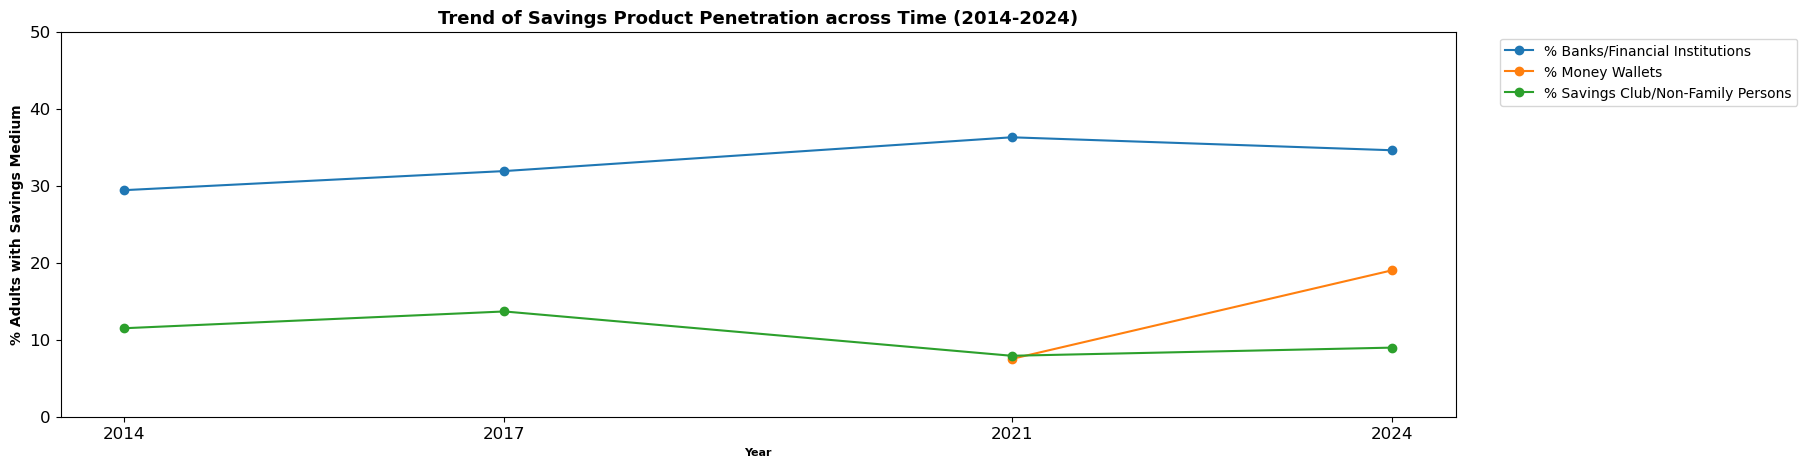

Comparison Adult Savings Medium across Time         
(% Population Penetration)


year,2014,2017,2021,2024,17vs14 % Change,21vs17 % Change,24vs21 % Change
% Banks/Financial Institutions,29.421490,31.903552,36.289993,34.606780,8.436223,13.749069,-4.638229
% Money Wallets,NaN,NaN,7.502387,19.016509,NaN,NaN,153.472789
% Savings Club/Non-Family Persons,11.490467,13.670362,7.915399,8.973928,18.971339,-42.098100,13.373024


In [9]:
# data preparation
df_average = df_all.pivot_table(index='year',\
                                values=['fin17a','fin17b','fin17c'],\
                                aggfunc='mean', \
                                sort=True)*100

df_average.columns = ['% Banks/Financial Institutions','% Money Wallets','% Savings Club/Non-Family Persons']
df_average

# chart prepartion
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(df_average, marker='o')

ax.set_title('Trend of Savings Product Penetration across Time (2014-2024)', \
             fontweight='bold',\
             fontsize=13)

ax.set_xlabel('Year',\
              fontweight='bold',\
              fontsize=8)

ax.set_ylabel('% Adults with Savings Medium', fontweight='bold', fontsize=10)

# add_labels(list(df_average.columns), df_average.index)

plt.xticks((2014, 2017, 2021, 2024),\
           fontsize = 12)

plt.yticks(range(0,60,10),\
           fontsize=12)

plt.legend(list(df_average.columns),\
           bbox_to_anchor=(1.25, 1),\
           fontsize=10)


plt.show()

# table summary
df_overview = df_average.sort_values(by=['year']).transpose()

# display comparison of growth per 3 years 
calculate_prct_change(df_overview)

print('Comparison Adult Savings Medium across Time \
        \n(% Population Penetration)')
display(df_overview)

<i>Analysis Notes
- <i> The analysis shows a 10-year period progression over 3-year intervals, as the survey is conducted every 3 years.
- <i> The question on money wallets (fin17b) was introduced in the 2021 Survey.
- <i> Viet Nam's 2021 data was collected in 2022 due to logistical concerns during COVID-19 Pandemic.

#### Insights

1. Across ASEAN-6, <b>adults saved the most in banks or other financial institutions</b>, with around a third of the region's adults sharing that they have a savings account with a bank or financial institution in the past decade.
2. On the other hand, <b>only around 10% of ASEAN's adult population reports having their savings in a savings club or with non-family persons </b> in the same period.
3. A rapid growth in usage of money wallets was observed in 3 years, as the <b> percentage of adults using a money wallet as a savings account significantly grew by 153% from 2021 (7.5%) to 2024 (19.0%)</b>.
4. Despite money wallets being a recent innovation, their growth in penetration quickly overtook savings clubs by 2024. By 2024, <b>more adults report to have savings in money wallets (19.0%) rather than savings clubs (9.0%)</b>.
5. However, despite the rapid penetration growth of money wallets as savings accounts, banking and financial institutions remain the dominant medium of savings in ASEAN-6 -despite the rapid penetration growth of money wallets as savings accounts. <b>Banking and financial institutions remain the dominant medium of savings </b> in ASEAN-6.

<br>

--------------------------------------------------------------------------------------

<br>

<i> Survey Questions </i>
- Question for Banks/ Financial Institutions: "In the PAST 12 MONTHS, have you saved or set aside any money by using an account at a bank or similar financial institution?"
- Question for Money Wallets: "In the PAST 12 MONTHS, have you saved or set aside any money by using a mobile money account"
- Questions for Savings Clubs: "In the PAST 12 MONTHS, have you saved or set aside any money using an informal savings group/club such as a merry-go-round or a burial society, VICOBA or a person outside the family"
</i>

## 2.3 Breakdown of Products Savings Penetration by Country across Time

### 2.3.1 Saving at Banks/Financial Institutions in SEA
Overall Comparison of Saving at Banks/Financial Institution by Country and Over Time (2021-2024)

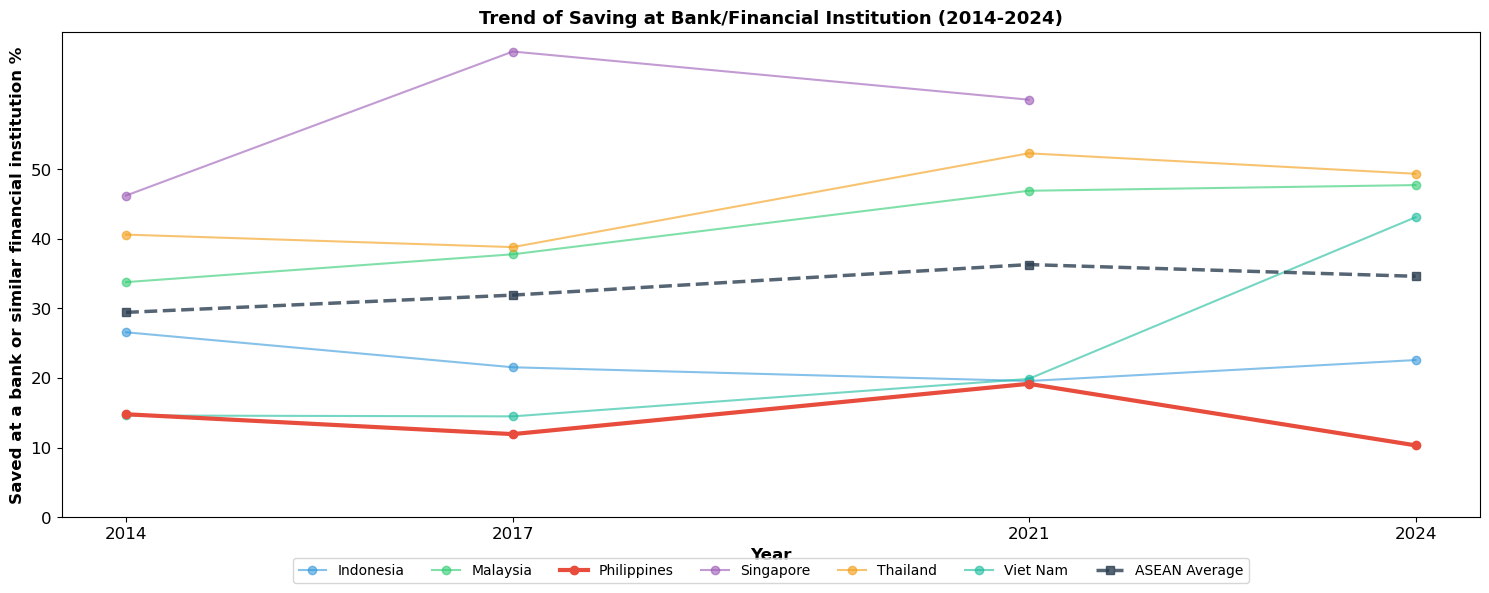

Trend of Saving at Bank/Financial Institution (2014-2024)


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,26.563051,21.534392,19.559278,22.571358,22.557020,-18.931029,-9.171906,15.399750
1,Malaysia,33.770643,37.769749,46.896697,47.714147,41.537809,11.841961,24.164703,1.743088
2,Philippines,14.785589,11.930414,19.158679,10.316702,14.047846,-19.310525,60.586871,-46.151287
3,Singapore,46.206745,66.903075,59.985962,NaN,57.698594,44.790712,-10.339006,NaN
4,Thailand,40.597114,38.801022,52.278944,49.342638,45.254930,-4.424188,34.735999,-5.616614
5,Viet Nam,14.605795,14.482659,19.860399,43.089056,23.009477,-0.843061,37.132275,116.959665


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin17a,29.42149,31.903552,36.289993,34.60678,33.055454,8.436223,13.749069,-4.638229


In [10]:
compare_over_time(df_all, 'fin17a', 'Trend of Saving at Bank/Financial Institution (2014-2024)' ,'Saved at a bank or similar financial institution %')

<i>Analysis Notes
- <i> The analysis shows a 10-year period progression over 3-year intervals, as the survey is conducted every 3 years.
- <i> Viet Nam's 2021 data was collected in 2022 due to logistical concerns during COVID-19 Pandemic.
- <i> Singapore has no data for this item in 2024. Interpret with caution.
- <i> Question for Banks/ Financial Institutions: "In the PAST 12 MONTHS, have you saved or set aside any money by using an account at a bank or similar financial institution?"

<b>Observations:</b>
1. Over the past decade, Singapore has significantly led* as the country with the highest proportion of its adults who have their savings in a bank/financial institution. The country with the second-highest savings in bank/financial institutions is Thailand, with an average of half of its adult population holding their savings in a bank/financial institution. 
2. Across ASEAN-6, the ranking of penetration remains consistent across the years, except for Viet Nam in 2024. In 2024, Viet Nam's proportion of adults holding their savings in a bank/financial institution shot up by 116% from 2021, not just overtaking Indonesia by rank, but also performing higher than the average of the region in that period (34%)
3. The Philippines has the lowest proportion of adults who hold their savings in a bank account. In the past decade, less than 20% of the population has had their savings in a bank/financial institution account. In 2024, the share of adults who had a bank/financial institution savings account declined to 10.3%, which is the lowest in the past decade.

*excluding 2024 data

### 2.3.2 Overall Comparison of Saving at Money Wallets by Country and Over Time (2021-2024)

<b><i>Data collection on whether citizens saved money using their money wallets started in 2021. Singapore does not have any data in 2024. World data also does not have data on this variable.</b></i>

ASEAN's overall trend is an increase of saving at Money Wallets from X% in 2021 to Y% 2024, indicating an increase of money wallets' saving product penetration across the region.
Philippines , ranking the 3rd 

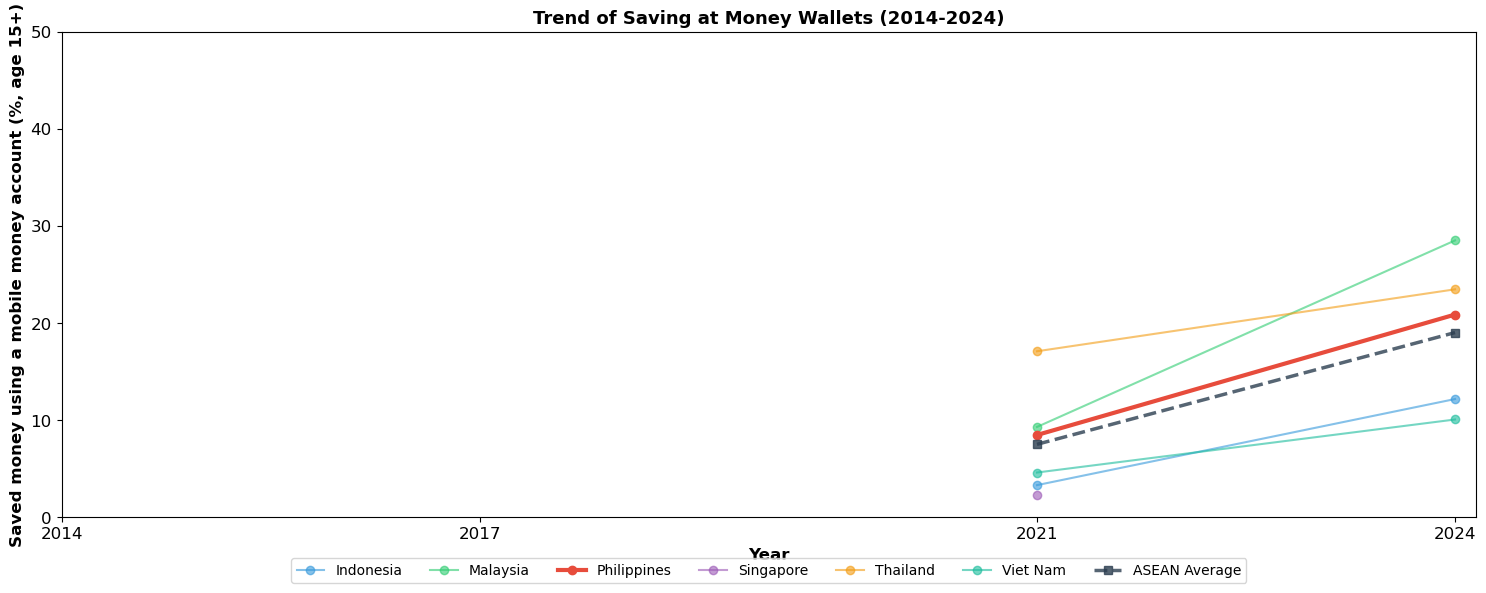

Trend of Saving at Money Wallets (2014-2024)


year,countrynewwb,2021,2024,average,24vs21 % Change
0,Indonesia,3.297685,12.168200,7.732942,268.992212
1,Malaysia,9.292094,28.508799,18.900446,206.807046
2,Philippines,8.463521,20.872159,14.667840,146.613198
3,Singapore,2.273484,NaN,2.273484,NaN
4,Thailand,17.089490,23.472562,20.281026,37.350862
5,Viet Nam,4.598046,10.060823,7.329435,118.806484


Average across Years (%)


year,index,2021,2024,average,24vs21 % Change
0,fin17b,7.502387,19.016509,13.259448,153.472789


In [11]:
compare_over_time(df_all, 'fin17b', 'Trend of Saving at Money Wallets (2014-2024)' ,'Saved money using a mobile money account (%, age 15+)')

--------------

<i>Analysis Notes
- <i> The analysis shows a 10-year period progression over 3-year intervals, as the survey is conducted every 3 years.
- <i> The question on money wallets (fin17b) was introduced in the 2021 Survey.
- <i> Viet Nam's 2021 data was collected in 2022 due to logistical concerns during COVID-19 Pandemic.
- <i> Singapore has no data for this item in 2024. Interpret with caution.
- <i> Question for Money Wallets: "In the PAST 12 MONTHS, have you saved or set aside any money by using a mobile money account"

----------------
#### Insights

1. There was a boom in the use of money wallets as a savings account in 2024 from 2021, as the percentage of adults in ASEAN-6 using money wallets for savings grew by 153%.
2. There are 3 countries that have a higher penetration than average in this 2021-2024 period: Thailand, Malaysia, and the Philippines. In 2024, Malaysia ranked the 1st in proportion of adults using money wallets for savings, with more than a quarter of its population having a savings accounts in a money wallet (28.5%). The next highest country in savings by money wallet in 2024 is Thailand (23%), followed by the Philippines (20%).
3. The remaining countries (excluding Singapore, which has no data), have only about a tenth of their population using money wallets as a savings account (Indonesia: 12%, Viet Nam: 10%)

### 2.3.3 Overall Comparison of Saving with Savings Club/Non-Family Persons by Country and Over Time (2021-2024)

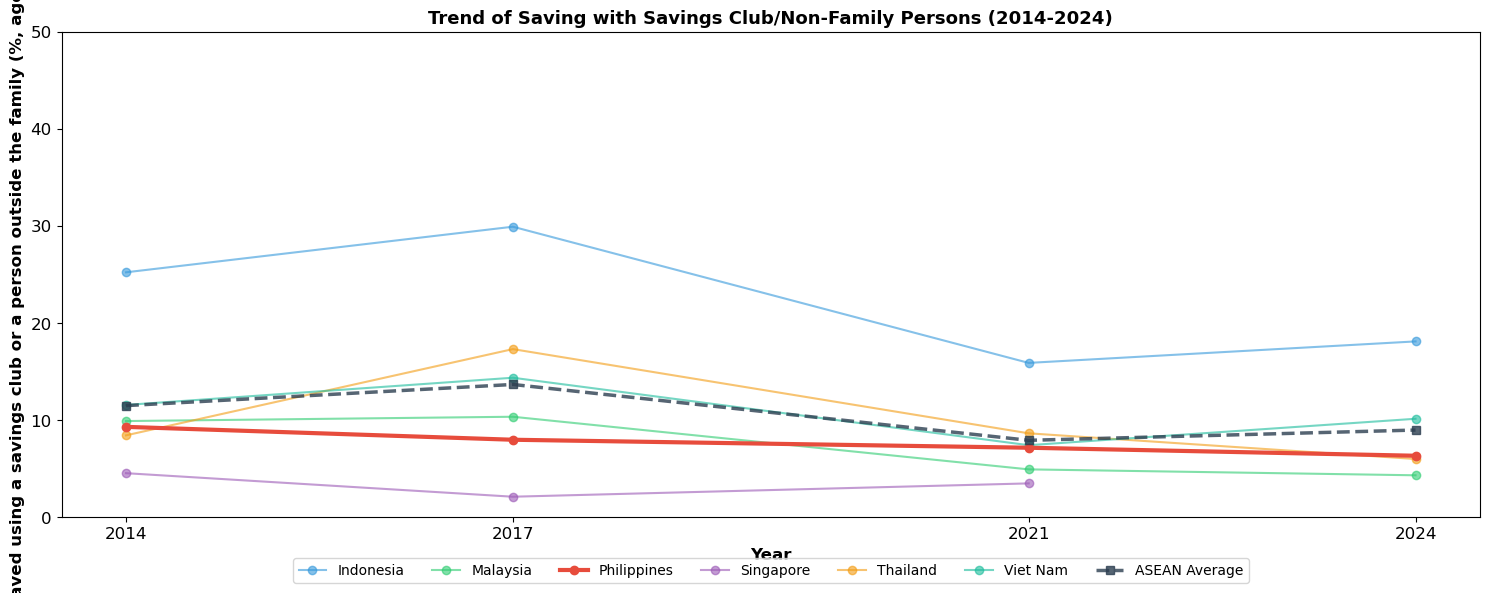

Trend of Saving with Savings Club/Non-Family Persons (2014-2024)


year,countrynewwb,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,Indonesia,25.225186,29.922673,15.891837,18.105479,22.286294,18.622211,-46.890316,13.929428
1,Malaysia,9.900414,10.344106,4.921782,4.312207,7.369627,4.481546,-52.419449,-12.385249
2,Philippines,9.301649,7.974347,7.151625,6.324970,7.688148,-14.269534,-10.317107,-11.558981
3,Singapore,4.529485,2.104587,3.477644,NaN,3.370572,-53.535844,65.241191,NaN
4,Thailand,8.426900,17.312735,8.636585,5.991290,10.091877,105.446076,-50.114263,-30.628954
5,Viet Nam,11.559169,14.363726,7.412922,10.135692,10.867877,24.262628,-48.391370,36.730047


Average across Years (%)


year,index,2014,2017,2021,2024,average,17vs14 % Change,21vs17 % Change,24vs21 % Change
0,fin17c,11.490467,13.670362,7.915399,8.973928,10.512539,18.971339,-42.0981,13.373024


In [12]:
compare_over_time(df_all, 'fin17c', 'Trend of Saving with Savings Club/Non-Family Persons (2014-2024)' ,'Saved using a savings club or a person outside the family (%, age 15+)')

<i>Analysis Notes
- <i> The analysis shows 10 years of progression over 3-year intervals, as the survey is conducted every 3 years.
- <i> The question on money wallets (fin17b) was introduced in the 2021 Survey.
- <i> Viet Nam's 2021 data was collected in 2022 due to logistical concerns during COVID-19 Pandemic.
- <i> Singapore has no data for this item in 2024. Interpret with caution.
- <i> Questions for Savings Clubs: "In the PAST 12 MONTHS, have you saved or set aside any money using an informal savings group/club such as a merry-go-round or a burial society, VICOBA or a person outside the family"

#### Observations

1. For this informal medium of savings, Indonesia has had the highest usage in the past decade (22%), which is twice the regional average of 10.5%
2. There was a dip in savings through savings clubs/non-family persons from 2017 to 2021. From 2017 to 2021, savings in this medium declined drastically by 42%. By 2024, while the regional average picked up by 13%, only Viet Nam and Indonesia show growth. The regional increase was pulled up largely by Viet Nam's 36% increase from 2021 followed by Indonesia's increase of 13.9%. The rest of the countries declined in using this method. To note, these 3 countries (Malaysia, Philppines, and Thailand)  whose usage of this informal medium of savings that continued to decline in 2024 are the top 3 countries whose proportion of adults have a savings account at a money wallet.
3. For this savings medium, Singapore has the least penetration of adult usage, averaging only 3% in the past decade (versus regional average of 10.5%)

## 2.4 Summary


1. <b> Dominance of Formal and Secured Savings</b>: Generally, the dominant medium of savings is still the most formal and regulated platform: banks and financial institutions.
2. <b> Boom in Digital Savings</b>: While there has been a recent boom in the adoption of digital platforms for savings (mobile wallets), banks and financial institutions remain the top choice of savings medium.
3. <b> Distinct Saving Preferences</b>: While these countries belong in the same region, some countries have distinct savings behaviors and preferences. Singapore has the highest use of savings in banking/financial institutions and the least in informal organizations (i.e., savings clubs, non-family persons). On the other hand, while Indonesia lags in saving through banks and mobile wallets, it has the top use of informal savings options like savings clubs and through non-family persons.
4. <b>PH Shift to Tech Savings</b>: In 2024, the Philippines had the lowest usage of banks and financial institutions for savings. The country also has fewer adults with informal savings (e.g., savings clubs). But, its usage of money wallets for saving has significantly increased (more than doubled) since 2021. This may mean that Filipinos are not quick adopters of new technology for savings, they may be preferring to transfer their savings from both the formal financial institutions and informal groups/people to digital platforms. 





<i>Analysis Notes
- <i> The analysis shows 10 years of progression over 3-year intervals, as the survey is conducted every 3 years.
- <i> The question on money wallets (fin17b) was introduced in the 2021 Survey.
- <i> Viet Nam's 2021 data was collected in 2022 due to logistical concerns during COVID-19 Pandemic.
- <i> Singapore has no data for this item in 2024. Interpret with caution.